# Objective
* The objective is to identify a fraudlent transaction as accurately as possible.
* To Compare different models based on their performance

##### Import neccessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns        
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Load the dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Fraud Detection/fraud_data.csv")

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### Exploratory Data Analysis

In [6]:
print("Number of records:\t\t",data.shape[0])
print("Number of features per record:\t",data.shape[1])

Number of records:		 6362620
Number of features per record:	 11


In [7]:
print("Any missing data?\nTrue or False : ",data.isnull().sum().any())

Any missing data?
True or False :  False


In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
print("Any transaction with amount less than or equal to 0?")
print(len(data[data.amount<=0]))
print("What type of transactions are they?")
print(data[data.amount<=0]['type'].value_counts().index[0])

Any transaction with amount less than or equal to 0?
16
What type of transactions are they?
CASH_OUT


## Data Visualization

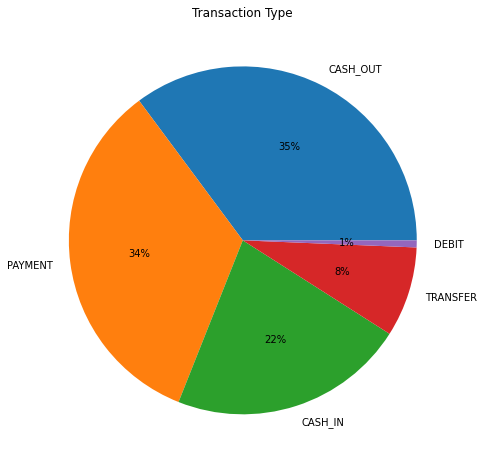

In [12]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

#### Delete unwanted features (Remove isFlaggedFraud and keep isFraud as target feature)

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
data.drop(['step','nameOrig','nameDest','isFlaggedFraud','oldbalanceDest','newbalanceDest'],axis=1,inplace=True)
data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0
1,PAYMENT,1864.28,21249.0,19384.72,0
2,TRANSFER,181.00,181.0,0.00,1
3,CASH_OUT,181.00,181.0,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0


In [16]:
data.rename(columns={"oldbalanceOrg":"old_bal"},inplace = True)
data.rename(columns={"newbalanceOrig":"new_bal"},inplace = True)
data.head()

,type,amount,old_bal,new_bal,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0
1,PAYMENT,1864.28,21249.0,19384.72,0
2,TRANSFER,181.00,181.0,0.00,1
3,CASH_OUT,181.00,181.0,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0


In [17]:
print("Type",np.unique(data.type))

Type ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [19]:
data.head()

,type,amount,old_bal,new_bal,isFraud
0,3,9839.64,170136.0,160296.36,0
1,3,1864.28,21249.0,19384.72,0
2,4,181.00,181.0,0.00,1
3,1,181.00,181.0,0.00,1
4,3,11668.14,41554.0,29885.86,0


In [20]:
print("Type",np.unique(data.type))

Type [0 1 2 3 4]


In [21]:
X = data.drop(["isFraud"],axis=1)
y = data.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4771965, 4), (1590655, 4), (4771965,), (1590655,))

In [22]:
X_train

,type,amount,old_bal,new_bal
391837,0,26154.83,909751.31,935906.13
1262827,4,483518.37,174.00,0.00
3281266,1,158627.98,7046.00,0.00
5595668,3,25555.05,625638.00,600082.95
3879004,0,7897.48,2668687.92,2676585.39
...,...,...,...,...
5172440,1,34766.86,67780.00,33013.14
5386563,1,171296.74,0.00,0.00
258017,3,9216.64,181920.00,172703.36
2359966,3,9336.03,41053.00,31716.97


In [23]:
X_test

,type,amount,old_bal,new_bal
3491989,4,293904.33,0.00,0.00
2701196,4,315330.18,364148.00,48817.82
2675469,1,72247.86,11857.00,0.00
2088944,1,161031.36,447504.00,286472.64
558944,0,260385.21,4052652.93,4313038.14
...,...,...,...,...
2822458,0,142373.82,15232236.00,15374609.82
2014979,0,106334.92,10315804.73,10422139.65
3123745,1,14002.42,0.00,0.00
5254952,3,16561.50,26475.00,9913.50


In [24]:
y_train

391837     0
1262827    0
3281266    0
5595668    0
3879004    0
          ..
5172440    0
5386563    0
258017     0
2359966    0
4688239    0
Name: isFraud, Length: 4771965, dtype: int64

In [25]:
y_test

3491989    0
2701196    0
2675469    0
2088944    0
558944     0
          ..
2822458    0
2014979    0
3123745    0
5254952    0
3935346    0
Name: isFraud, Length: 1590655, dtype: int64

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("How many class does the model predict?",np.unique(prediction ))
print("Numbers in each class:\t","0 :",len(prediction[prediction==0]))
print("\t\t\t 1 :",len(prediction[prediction==1]))

f1score = f1_score(y_test, prediction)
print('f1 score:', f1score)

print("Training Score: ",model.score(X_train,y_train))
print("Testing Score",model.score(X_test,y_test))

How many class does the model predict? [0 1]
Numbers in each class:	 0 : 1589771
			 1 : 884
f1 score: 0.5141300646918625
Training Score:  0.9991085433359214
Testing Score 0.9991028852893934


## Since the dataset extremely imbalanced, some workaround can be done to overcome this. Below are all the methods listed

# 1. Up-sample Minority Class
    Randomly duplicate the data from the minority class.

In [27]:
n = data.isFraud.value_counts()[0]

# Separate majority and minority classes
df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=n,    
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.isFraud.value_counts()

The new class count are :


0    6354407
1    6354407
Name: isFraud, dtype: int64

In [35]:
X = df_upsampled.drop(["isFraud"],axis = 1)
y = df_upsampled.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

model_up = LogisticRegression()
model_up.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = model_up.predict(X_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

print("How many class does the model predict?",np.unique( up_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(up_scale_pred[up_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(up_scale_pred[up_scale_pred==1]))

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of thie model:\t\t",acc_up_scale)


(9531610, 4) (3177204, 4) (9531610,) (3177204,)
f1 score for the testing data:	 0.9129755207471019
How many class does the model predict? [0 1]
Count in each class:			 0 : 1310969
					 1 : 1866235
Accuracy of thie model:		 0.9053708858480601


# 2. Down-sample Majority Class
     Randomly remove data from the majority class

In [31]:
n = data.isFraud.value_counts()[1]

# Separate majority and minority classes

df_majority = data[data.isFraud==0]
df_minority = data[data.isFraud==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.isFraud.value_counts())

The new class count are:
0    8213
1    8213
Name: isFraud, dtype: int64


In [32]:
# Separate input features (X) and target variable (y)
y = df_downsampled.isFraud
X = df_downsampled.drop(['isFraud'], axis=1)
 
# Train model
model_down = LogisticRegression().fit(X, y)
 
# Predict on training set
down_scale_pred = model_down.predict(X)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)


How many class does the model predict? [0 1]
Count in each class:			 0 : 6801
					 1 : 9625
f1 score for the testing data:		 0.9141159322794036
Accuracy of the model:			 0.9067332278095702


# 3. Tree-Based Algorithms

In [36]:
# Separate input features (X) and target variable (y)
y = data.isFraud
X = data.drop(['isFraud'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# Predict on training set
rfc_pred = rfc.predict(X_test)

In [39]:
f1_rfc = f1_score(y_test, rfc_pred)
print('f1 score:\t\t', f1_rfc)


acc_rfc=accuracy_score(y_test, rfc_pred) 
print("Accuracy of the model:\t", acc_rfc)


f1 score:		 0.8851432699253552
Accuracy of the model:	 0.9997001235340158


In [41]:
data = {'Model':['Logistic Regression','UpScaled Logistic Regression','DownScaled Logistic Regression','RandomForest'],
        'f1 score':[f1score,f1up_scale_pred,f1down_scale_pred,f1_rfc],
        'Accuracy Score':[model.score(X_test,y_test),acc_up_scale,acc_down_scale,acc_rfc]}

comparision_table=pd.DataFrame(data)                               
print(comparision_table)

                            Model  f1 score  Accuracy Score
0             Logistic Regression  0.514130        0.999087
1    UpScaled Logistic Regression  0.912976        0.905371
2  DownScaled Logistic Regression  0.914116        0.906733
3                    RandomForest  0.885143        0.999700


In [43]:
#import pickle
#pickle.dump(model_up,open('/content/drive/MyDrive/Fraud Detection/fraud_model.pkl','wb'))